## Clean the data

* correct types of all columns
* create dummies for all categorical variables

In [33]:
import os
from datetime import timedelta
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
trainpath = os.path.join("..", "data", "BADS_WS1819_known.csv")
dtypes = {"item_id": object, "brand_id": object, "user_id": object}

data = pd.read_csv(trainpath, parse_dates=["order_date", "delivery_date", "user_dob", "user_reg_date"],
                   index_col=["order_item_id"], dtype=dtypes, na_values="not_reported")

In [4]:
data.head(10)

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
order_item_id,,,,,,,,,,,,,
ID1,2016-05-13,2016-05-16,1040,38,red,138,69.9,19065,Mrs,NaT,Lower Saxony,2016-05-14,1
ID2,2016-09-26,NaT,4490,m,grey,133,59.9,32349,Mrs,1967-02-21,North Rhine-Westphalia,2015-02-17,0
ID3,2017-02-28,2017-05-09,4792,m,ecru,128,99.9,74743,Mrs,NaT,North Rhine-Westphalia,2017-02-14,0
ID4,2017-01-23,2017-01-24,4686,L,terracotta,105,59.9,32935,Mrs,1961-01-08,North Rhine-Westphalia,2015-02-17,0
ID5,2016-05-13,2016-05-16,648,39,petrol,170,139.9,2842,Mrs,1966-05-01,Schleswig-Holstein,2015-04-06,1
ID6,2016-06-27,2016-06-29,826,46,purple,111,44.9,10005,Mrs,1958-03-05,North Rhine-Westphalia,2015-02-17,1
ID7,2017-02-23,2017-02-26,3696,40,ocher,174,35.9,76165,Mrs,NaT,Bavaria,2017-02-24,1
ID8,2016-11-09,2016-11-13,3136,41,red,116,159.9,61594,Mrs,1978-09-04,North Rhine-Westphalia,2015-02-17,1
ID9,2016-08-07,2016-08-22,4176,8,black,119,119.9,40827,Mr,1976-10-21,Bavaria,2016-08-08,1


In [5]:
# get dummies
size_dummies = pd.get_dummies(data.item_size)
color_dummies = pd.get_dummies(data.item_color)
title_dummies = pd.get_dummies(data.user_title)
region_dummies = pd.get_dummies(data.user_state)

In [6]:
size_dummies.head()

,1,10,10+,100,104,105,11,11+,116,12,...,XXL,XXXL,l,m,s,unsized,xl,xs,xxl,xxxl
order_item_id,,,,,,,,,,,,,,,,,,,,,
ID1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ID3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ID4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.describe()

,item_price,return
count,100000.000000,100000.000000
mean,70.279143,0.481740
std,44.973992,0.499669
min,0.000000,0.000000
25%,34.900000,0.000000
50%,59.900000,0.000000
75%,89.900000,1.000000
max,399.950000,1.000000


In [8]:
def check_date(date):
    minimum = date.min()
    maximum = date.max()
    print("MIN:", minimum)
    print("MAX:", maximum)
    return minimum, maximum

check_date(data.order_date);

MIN: 2016-04-01 00:00:00
MAX: 2017-03-31 00:00:00


In [9]:
for date in data.order_date, data.delivery_date, data.user_dob, data.user_reg_date:
    check_date(date)

MIN: 2016-04-01 00:00:00
MAX: 2017-03-31 00:00:00
MIN: 1994-12-31 00:00:00
MAX: 2017-07-22 00:00:00
MIN: 1900-11-21 00:00:00
MAX: 2012-11-12 00:00:00
MIN: 2015-02-17 00:00:00
MAX: 2017-04-01 00:00:00


In [10]:
data.loc[data.delivery_date == data.delivery_date.min()]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
order_item_id,,,,,,,,,,,,,
ID104,2016-10-26,1994-12-31,3098,8,blue,119,59.90,59761,Mrs,NaT,Lower Saxony,2016-10-27,1
ID123,2016-09-19,1994-12-31,2970,41,aubergine,101,149.90,51463,Mrs,NaT,North Rhine-Westphalia,2016-09-20,0
ID236,2017-02-09,1994-12-31,4808,M,ecru,146,24.90,74132,Mr,1963-03-28,North Rhine-Westphalia,2017-02-10,0
ID527,2017-01-10,1994-12-31,5024,L,green,105,79.90,4510,Mrs,1968-08-31,Lower Saxony,2015-02-17,0
ID1191,2017-02-14,1994-12-31,5516,XL,brown,148,199.95,74930,Mr,1948-07-27,Lower Saxony,2017-02-15,0
ID1311,2016-07-02,1994-12-31,1322,19,nature,139,39.95,35032,Mrs,1974-10-29,Schleswig-Holstein,2015-05-06,0
ID1430,2017-03-05,1994-12-31,4692,M,olive,103,21.90,44354,Mrs,1966-04-21,Lower Saxony,2016-01-15,1
ID1490,2017-03-05,1994-12-31,4752,L,green,149,119.90,80136,Mrs,1987-08-06,Hamburg,2017-03-06,0
ID1797,2017-02-21,1994-12-31,4992,39,red,200,109.95,75611,Mrs,1960-05-09,Bavaria,2017-02-20,0


In [11]:
non_missing = data.loc[data.delivery_date > data.delivery_date.min(), :]

In [12]:
non_missing["days_since_delivery"] = non_missing["delivery_date"] - non_missing["order_date"]

/home/siskos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
non_missing.days_since_delivery.value_counts()

2 days      17402
3 days      16809
1 days      13919
4 days      10841
5 days       4947
6 days       2070
7 days       1343
8 days        915
11 days       895
9 days        854
10 days       743
12 days       736
14 days       630
13 days       625
15 days       584
18 days       542
17 days       532
19 days       493
16 days       491
25 days       477
20 days       469
23 days       463
22 days       459
21 days       452
30 days       419
24 days       419
28 days       392
26 days       389
29 days       371
32 days       368
            ...  
111 days        7
115 days        6
140 days        6
135 days        6
141 days        6
128 days        5
119 days        5
124 days        5
122 days        4
123 days        4
130 days        4
134 days        3
121 days        3
126 days        3
139 days        3
113 days        3
120 days        3
138 days        3
145 days        2
142 days        2
132 days        2
127 days        2
143 days        2
131 days        2
125 days  

In [14]:
vals, counts = np.unique(non_missing.days_since_delivery.dt.days, return_counts=True)

<BarContainer object of 12 artists>

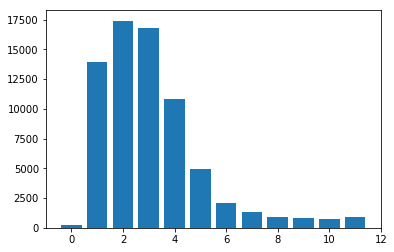

In [20]:
plt.bar(vals[:12], counts[:12])

<BarContainer object of 11 artists>

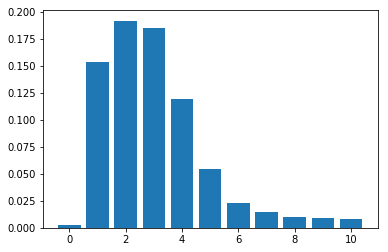

In [22]:
probs = counts/sum(counts)
plt.bar(vals[:11], probs[:11])

In [25]:
probs.cumsum()[:40]

array([0.0029532 , 0.1563323 , 0.34809199, 0.53331717, 0.65277854,
       0.70729154, 0.73010171, 0.74490077, 0.75498353, 0.7643941 ,
       0.77258152, 0.78244388, 0.79055417, 0.79744129, 0.80438352,
       0.81081885, 0.81622938, 0.8220917 , 0.82806422, 0.83349679,
       0.83866489, 0.84364566, 0.84870357, 0.85380555, 0.85842268,
       0.86367894, 0.86796549, 0.87171208, 0.87603169, 0.88011989,
       0.88473702, 0.8884175 , 0.89247264, 0.89618618, 0.8996022 ,
       0.90273171, 0.90600447, 0.90907889, 0.91246185, 0.91576767])

In [28]:
grouped = non_missing.groupby(non_missing.order_date.dt.month).days_since_delivery.value_counts()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba68cd6b00>],
      dtype=object)

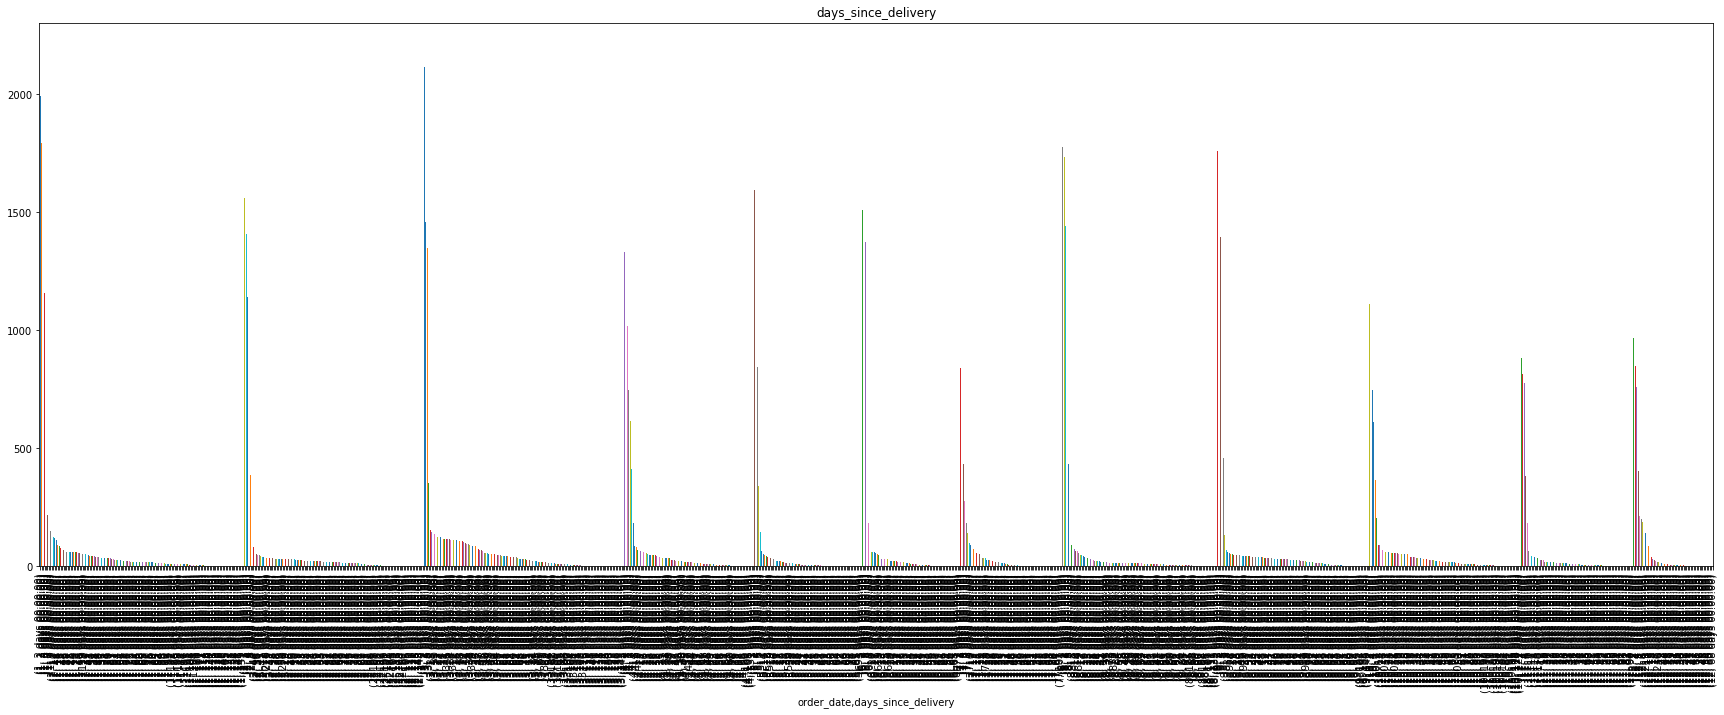

In [31]:
fig, ax = plt.subplots(figsize=(30, 10))
grouped.plot(kind="bar", subplots=True, ax=ax)

In [43]:
weird_delivery = (data.delivery_date == data.delivery_date.min()) | (pd.isnull(data.delivery_date))
data.loc[weird_delivery, "delivery_date"] = data.loc[weird_delivery, "order_date"] + timedelta(days=2) 

In [34]:
timedelta(days=1)

datetime.timedelta(1)

In [38]:
check_date(data.delivery_date)

MIN: 2016-04-03 00:00:00
MAX: 2017-07-22 00:00:00


(Timestamp('2016-04-03 00:00:00'), Timestamp('2017-07-22 00:00:00'))

In [41]:
sum(pd.isnull(data.delivery_date))

8292

What did we do so far?

* we noticed some weird behavior in the delivery date column
* we replaced the weird values by a more sensible approach (add two days to order date)
* 

In [48]:
item_return = data.groupby("item_id")["return"].mean()
item_orders = data.groupby("item_id").order_date.count()

In [53]:
pd.DataFrame({"perc_return": item_return, "num_orders": item_orders}).sort_values("num_orders", ascending=False)

,perc_return,num_orders
item_id,,
3066,0.325397,756
4670,0.347537,751
2832,0.284000,750
66,0.352859,717
4692,0.304432,519
3216,0.506796,515
2942,0.410526,475
3094,0.440678,472
116,0.334081,446


In [55]:
data.loc[data.user_dob == data.user_dob.min()]

,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
order_item_id,,,,,,,,,,,,,
ID115,2016-05-04,2016-05-07,424,41,magenta,101,89.90,16306,Mrs,1900-11-21,Baden-Wuerttemberg,2015-02-17,1
ID444,2016-11-28,2016-11-30,2986,41,orange,147,39.90,50326,Mrs,1900-11-21,North Rhine-Westphalia,2015-02-17,0
ID448,2017-01-02,2017-03-01,4900,L,petrol,149,89.90,10927,Mrs,1900-11-21,Lower Saxony,2015-02-17,0
ID597,2016-05-20,2016-05-22,400,39,black,104,69.95,21546,Mrs,1900-11-21,Mecklenburg-Western Pomerania,2015-09-29,0
ID713,2016-12-11,2016-12-12,3334,L,red,136,99.90,5603,Mrs,1900-11-21,Hamburg,2015-02-17,1
ID762,2016-06-15,2016-06-18,594,6+,blue,119,49.90,22354,Mrs,1900-11-21,Lower Saxony,2015-02-17,1
ID888,2017-02-19,2017-02-20,5004,40,blue,101,129.90,4159,Mrs,1900-11-21,Baden-Wuerttemberg,2015-02-17,1
ID1147,2016-07-15,2016-07-18,2426,39,black,196,99.90,8456,Mrs,1900-11-21,North Rhine-Westphalia,2015-11-20,1
ID1166,2016-09-03,2016-09-05,2804,m,pink,103,26.90,15171,Mrs,1900-11-21,Bavaria,2015-09-28,0


In [54]:
data.columns

Index(['order_date', 'delivery_date', 'item_id', 'item_size', 'item_color',
       'brand_id', 'item_price', 'user_id', 'user_title', 'user_dob',
       'user_state', 'user_reg_date', 'return'],
      dtype='object')

In [56]:
data.item_size.nunique()

114

In [57]:
data.item_id.nunique()

2656

In [58]:
2656 * 114

302784